In [1]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from tqdm import tqdm
from datetime import datetime
import os
import sys
import argparse
import json
import time
import logging
import re
from typing import List, Iterable, Mapping, Tuple, Dict, Union, Optional, Any

from autoexpl.tools import fileio

# from tools.utils import lists
# from tools.utils import precision

from autoexpl.xqb import constants as c
from autoexpl import plots

In [2]:
exp_json = {}
for dataset in c.ldataset:
    exp_json[dataset] = fileio.load_file(c.info[dataset]["expjson_v4"])
gatheredfile = "xqb_eval/extrinsic/origvsexp.LLaMAtopone_ans_confGuesser.plqbv1ht512-esqbv1htall.pair_coment_charentskip_dedup_gent4_stepreduced.srcans.pickle"
dfs = pd.read_pickle(gatheredfile)

/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9

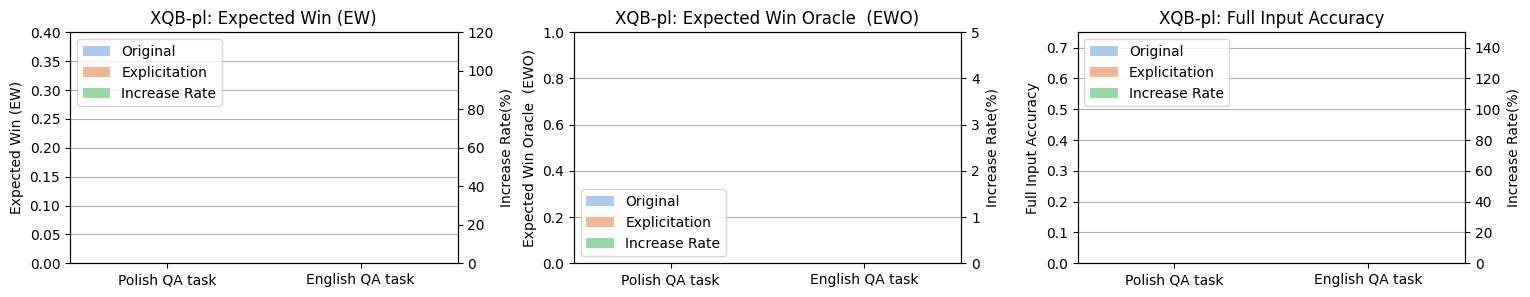

In [7]:
importlib.reload(plots)
importlib.reload(c)
dataset = "plqbv1ht512"
guesser = "LLaMA13Btopone_ans_confGuesser"

dataset = "plqbv1ht512"  # plqbv1ht512  esqbv1htall
qid_filter = c.info[dataset]["answer_related"]
l_exp_answer_incuded = c.info[dataset]["l_exp_answer_incuded"]
l_ent_id_related = c.info[dataset]["l_ent_id_related"]
l_orig_qid = set(dfs[dfs["dataset"] == dataset]["orig_qid"])
dlist = {
    "l_orig_qid_whole": l_orig_qid,
    "l_orig_qid_related": qid_filter,
    "l_ent_id_related": l_ent_id_related,
    "l_exp_answer_incuded": l_exp_answer_incuded,
}
llnag = c.info[dataset]["langs"]

comparetype = "relatedE"
llcompare = [
    ["orig_ew", "exp_tew"],
    ["orig_ewo", "exp_tewo"],
    ["orig_full_acc", "exp_full_acc"],
]

largs = [
    {
        "y1maxlim": 0.4,
        "y2maxlim": 120,
        "loc": "upper left",
        "all_explicitation": True,
        "man_ylabel": "ew",
        "title_prefix": c.info[dataset]["title_prefix"] + ": ",
    },
    {
        "y1maxlim": 1,
        "y2maxlim": 5,
        "loc": "lower left",
        "all_explicitation": True,
        "man_ylabel": "ewo",
        "title_prefix": c.info[dataset]["title_prefix"] + ": ",
    },
    {
        "y1maxlim": 0.75,
        "y2maxlim": 150,
        "loc": "upper left",
        "all_explicitation": True,
        "man_ylabel": "full_acc",
        "title_prefix": c.info[dataset]["title_prefix"] + ": ",
    },
]
for i, gentype in enumerate(c.lgentype):
    if gentype != "wikides":
        continue
    llcomb = []
    for i, lcompare in enumerate(llcompare):
        lcomb = []
        for lang in llnag:
            lcomb.append(
                {
                    "condtype": comparetype,
                    "gentype": gentype,
                    "lcompare": lcompare,
                    "lang": lang,
                }
            )
        llcomb.append(lcomb)
    fig = plots.plot3(
        plots.plot_compare_bar_pair,
        llcomb,
        dfs[(dfs["guesser"] == guesser)],
        largs,
        **dlist
    )

/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9

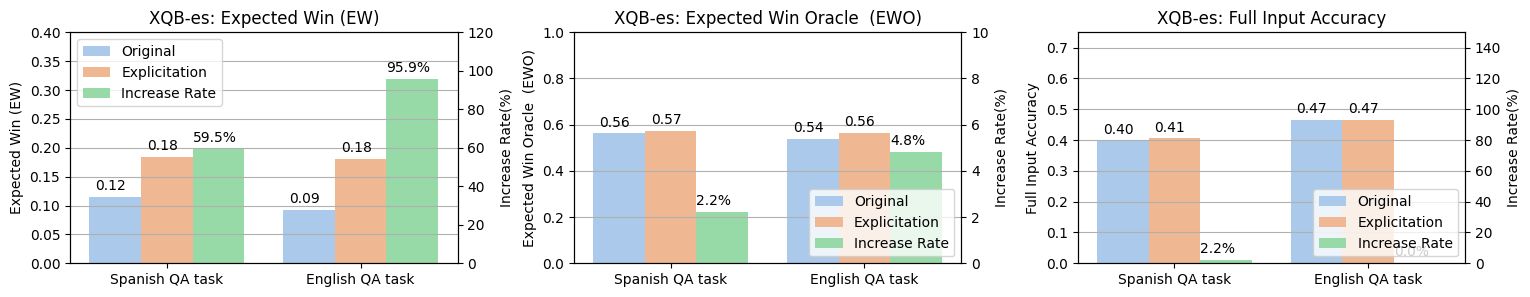

In [8]:
importlib.reload(plots)
importlib.reload(c)
guesser = "LLaMA7Btopone_ans_confGuesser"

dataset = "esqbv1htall"  # plqbv1ht512  esqbv1htall
qid_filter = c.info[dataset]["answer_related"]
l_exp_answer_incuded = c.info[dataset]["l_exp_answer_incuded"]
l_ent_id_related = c.info[dataset]["l_ent_id_related"]
l_orig_qid = set(dfs[dfs["dataset"] == dataset]["orig_qid"])
dlist = {
    "l_orig_qid_whole": l_orig_qid,
    "l_orig_qid_related": qid_filter,
    "l_ent_id_related": l_ent_id_related,
    "l_exp_answer_incuded": l_exp_answer_incuded,
}
llnag = c.info[dataset]["langs"]

comparetype = "relatedE"
llcompare = [
    ["orig_ew", "exp_tew"],
    ["orig_ewo", "exp_tewo"],
    ["orig_full_acc", "exp_full_acc"],
]
largs = [
    {
        "y1maxlim": 0.4,
        "y2maxlim": 120,
        "loc": "upper left",
        "all_explicitation": True,
        "man_ylabel": "ew",
        "title_prefix": c.info[dataset]["title_prefix"] + ": ",
    },
    {
        "y1maxlim": 1,
        "y2maxlim": 10,
        "turnofflegend": True,
        "all_explicitation": True,
        "man_ylabel": "ewo",
        "title_prefix": c.info[dataset]["title_prefix"] + ": ",
    },
    {
        "y1maxlim": 0.75,
        "y2maxlim": 150,
        "loc": "lower right",
        "all_explicitation": True,
        "man_ylabel": "full_acc",
        "title_prefix": c.info[dataset]["title_prefix"] + ": ",
    },
]

for i, gentype in enumerate(c.lgentype):
    if gentype != "wikides":
        continue
    llcomb = []
    for i, lcompare in enumerate(llcompare):
        lcomb = []
        for lang in llnag:
            lcomb.append(
                {
                    "condtype": comparetype,
                    "gentype": gentype,
                    "lcompare": lcompare,
                    "lang": lang,
                }
            )
        llcomb.append(lcomb)
    fig = plots.plot3(
        plots.plot_compare_bar_pair,
        llcomb,
        dfs[(dfs["guesser"] == guesser)],
        largs,
        **dlist
    )

# Appendix

/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/fs/clip-projects/qest/eloirghi/automatic_explicitation_LLM/.venv/lib/python3.9

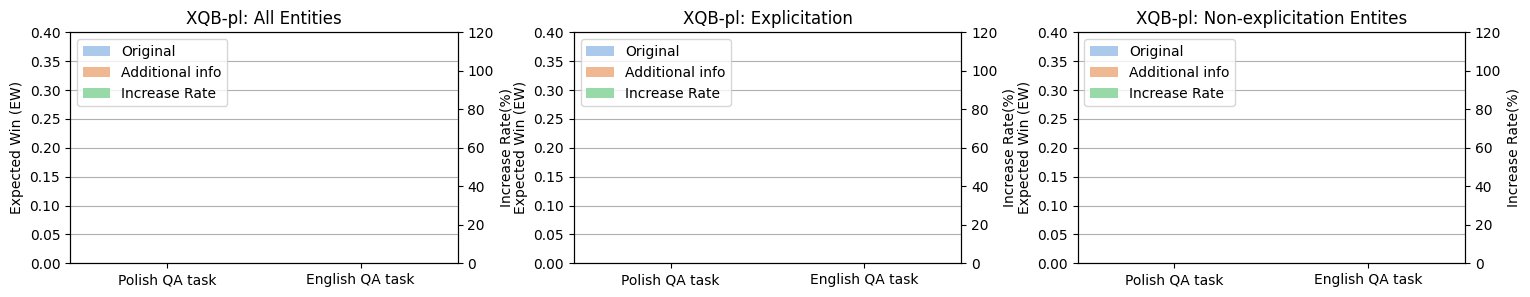

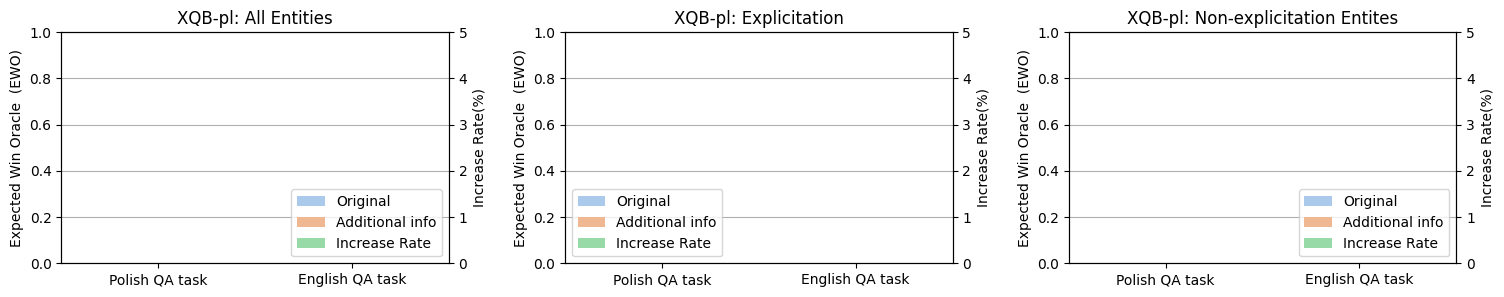

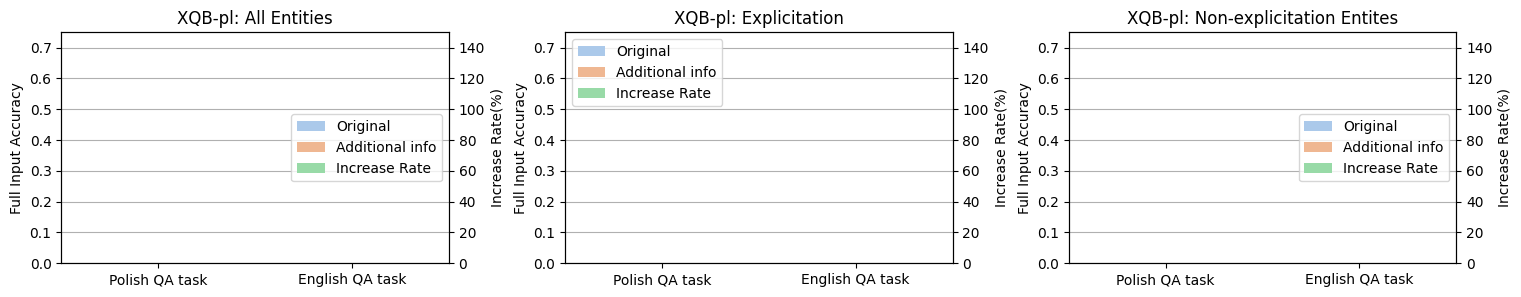

In [5]:
importlib.reload(plots)
importlib.reload(c)
guesser = "LLaMA13Btopone_ans_confGuesser"

dataset = "plqbv1ht512"  # plqbv1ht512  esqbv1htall
qid_filter = c.info[dataset]["answer_related"]
l_exp_answer_incuded = c.info[dataset]["l_exp_answer_incuded"]
l_ent_id_related = c.info[dataset]["l_ent_id_related"]
l_orig_qid = set(dfs[dfs["dataset"] == dataset]["orig_qid"])
dlist = {
    "l_orig_qid_whole": l_orig_qid,
    "l_orig_qid_related": qid_filter,
    "l_ent_id_related": l_ent_id_related,
    "l_exp_answer_incuded": l_exp_answer_incuded,
}
llnag = c.info[dataset]["langs"]

llcompare = [
    ["orig_ew", "exp_tew"],
    ["orig_ewo", "exp_tewo"],
    ["orig_full_acc", "exp_full_acc"],
]
llargs = [
    [
        {
            "y1maxlim": 0.4,
            "y2maxlim": 120,
            "loc": "upper left",
            "title_prefix": c.info[dataset]["title_prefix"] + ": ",
        },
        {
            "y1maxlim": 0.4,
            "y2maxlim": 120,
            "loc": "upper left",
            "title_prefix": c.info[dataset]["title_prefix"] + ": ",
        },
        {
            "y1maxlim": 0.4,
            "y2maxlim": 120,
            "loc": "upper left",
            "title_prefix": c.info[dataset]["title_prefix"] + ": ",
        },
    ],
    [
        {
            "y1maxlim": 1,
            "y2maxlim": 5,
            "loc": "lower right",
            "title_prefix": c.info[dataset]["title_prefix"] + ": ",
        },
        {
            "y1maxlim": 1,
            "y2maxlim": 5,
            "loc": "lower left",
            "title_prefix": c.info[dataset]["title_prefix"] + ": ",
        },
        {
            "y1maxlim": 1,
            "y2maxlim": 5,
            "loc": "lower right",
            "title_prefix": c.info[dataset]["title_prefix"] + ": ",
        },
    ],
    [
        {
            "y1maxlim": 0.75,
            "y2maxlim": 150,
            "loc": "center right",
            "title_prefix": c.info[dataset]["title_prefix"] + ": ",
        },
        {
            "y1maxlim": 0.75,
            "y2maxlim": 150,
            "loc": "upper left",
            "title_prefix": c.info[dataset]["title_prefix"] + ": ",
        },
        {
            "y1maxlim": 0.75,
            "y2maxlim": 150,
            "loc": "center right",
            "title_prefix": c.info[dataset]["title_prefix"] + ": ",
        },
    ],
]
gentype = "wikides"
output_dir = "figures"

for i, lcompare in enumerate(llcompare):
    llcomb = []
    for j, comparetype in enumerate(c.lcomparetype3):
        lcomb = []
        for lang in llnag:
            lcomb.append(
                {
                    "condtype": comparetype,
                    "gentype": gentype,
                    "lcompare": lcompare,
                    "lang": lang,
                }
            )
        llcomb.append(lcomb)
    metricname = lcompare[0].replace("orig_", "")
    fig = plots.plot3(
        plots.plot_compare_bar_pair,
        llcomb,
        dfs[(dfs["guesser"] == guesser)],
        llargs[i],
        **dlist,
    )
    filename = f"{dataset}_groupwise_{metricname}"
#   fig.savefig(
#       os.path.join(output_dir, f"{filename}.pdf"), bbox_inches="tight", dpi=200)